# Bharat Intern

## Task 1 : Stock Market Prediction using LSTM

### by - ARJUNSINGH RAWAT

In [ ]:
pip install yfinance

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
# Load stock data

stock_symbol = 'TECHM.NS'
start_date = '2006-09-01'
end_date = '2023-08-21'

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
#Save data into csv
data.to_csv('TECHM.NS.csv')

In [4]:
df = pd.read_csv('TECHM.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-09-01,134.750000,137.250000,133.774994,135.462494,100.214867,4704780
1,2006-09-04,135.500000,137.250000,113.199997,135.987503,100.603287,2999152
2,2006-09-05,136.000000,139.000000,134.625000,138.175003,102.221588,3824532
3,2006-09-06,138.675003,140.625000,134.500000,135.312500,100.103905,3830444
4,2006-09-07,136.250000,136.250000,132.500000,134.324997,99.373352,1404644
...,...,...,...,...,...,...,...
4179,2023-08-11,1235.800049,1250.349976,1215.300049,1220.449951,1220.449951,2933959
4180,2023-08-14,1212.099976,1221.199951,1203.000000,1219.750000,1219.750000,1842625
4181,2023-08-16,1221.000000,1239.000000,1220.000000,1227.849976,1227.849976,2341456
4182,2023-08-17,1225.000000,1233.900024,1214.550049,1231.750000,1231.750000,2636308


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-09-01,134.750000,137.250,133.774994,135.462494,100.214867,4704780
1,2006-09-04,135.500000,137.250,113.199997,135.987503,100.603287,2999152
2,2006-09-05,136.000000,139.000,134.625000,138.175003,102.221588,3824532
3,2006-09-06,138.675003,140.625,134.500000,135.312500,100.103905,3830444
4,2006-09-07,136.250000,136.250,132.500000,134.324997,99.373352,1404644


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4179,2023-08-11,1235.800049,1250.349976,1215.300049,1220.449951,1220.449951,2933959
4180,2023-08-14,1212.099976,1221.199951,1203.000000,1219.750000,1219.750000,1842625
4181,2023-08-16,1221.000000,1239.000000,1220.000000,1227.849976,1227.849976,2341456
4182,2023-08-17,1225.000000,1233.900024,1214.550049,1231.750000,1231.750000,2636308
4183,2023-08-18,1225.949951,1225.949951,1205.150024,1210.800049,1210.800049,1794430


In [7]:
df.shape

(4184, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4.184000e+03
mean,524.809432,532.300583,516.902913,524.375347,442.042453,2.592564e+06
std,356.678520,360.600657,352.289958,356.612453,337.263066,2.725477e+06
min,53.812500,55.825001,51.250000,52.325001,39.551384,0.000000e+00
25%,225.000000,228.812504,220.549999,225.459373,170.103928,1.018975e+06
50%,461.837494,467.649994,455.500000,461.125000,364.068329,1.967806e+06
75%,709.775009,717.762497,698.515625,708.909393,588.740082,3.280688e+06
max,1800.500000,1838.000000,1786.000000,1806.099976,1661.246704,4.109539e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4184 non-null   object 
 1   Open       4184 non-null   float64
 2   High       4184 non-null   float64
 3   Low        4184 non-null   float64
 4   Close      4184 non-null   float64
 5   Adj Close  4184 non-null   float64
 6   Volume     4184 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.9+ KB


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

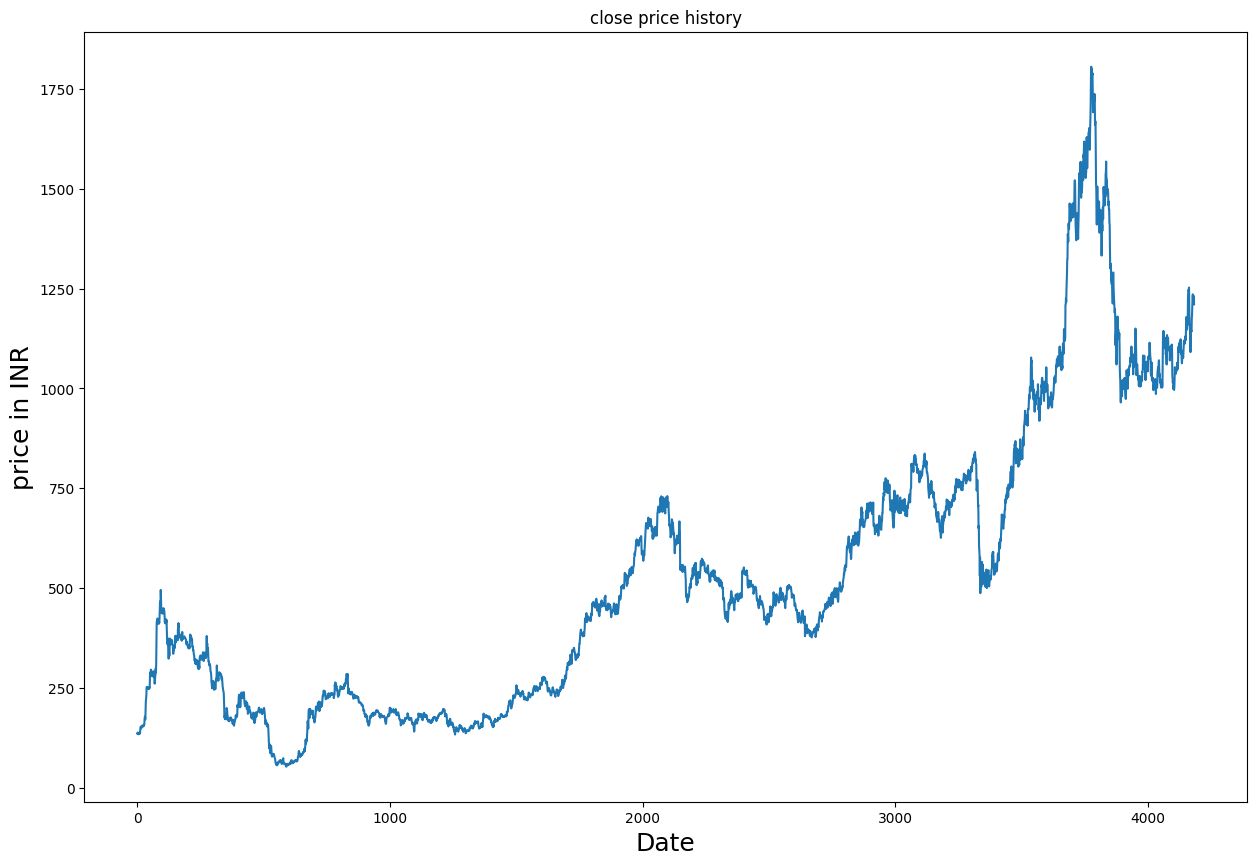

In [11]:
# Visualize the close price history
plt.figure(figsize=(15,10))
plt.title("close price history")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("price in INR",fontsize=18)
plt.show()

In [19]:
Data = df.filter(['Close']).values
Data.shape

(4184, 1)

In [20]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Data)

In [21]:
# Split data into train, validation, and test sets
train_data = scaled_data[:int(len(scaled_data)*0.8)]
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [22]:
# Build LSTM memory

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
#Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
104/104 [==============================] - 20s 105ms/step - loss: 0.0024
Epoch 2/50
104/104 [==============================] - 11s 106ms/step - loss: 6.7251e-04
Epoch 3/50
104/104 [==============================] - 11s 105ms/step - loss: 6.7237e-04
Epoch 4/50
104/104 [==============================] - 11s 106ms/step - loss: 5.4138e-04
Epoch 5/50
104/104 [==============================] - 11s 105ms/step - loss: 4.9623e-04
Epoch 6/50
104/104 [==============================] - 11s 105ms/step - loss: 5.1122e-04
Epoch 7/50
104/104 [==============================] - 12s 111ms/step - loss: 4.5980e-04
Epoch 8/50
104/104 [==============================] - 11s 102ms/step - loss: 4.0226e-04
Epoch 9/50
104/104 [==============================] - 11s 105ms/step - loss: 3.5754e-04
Epoch 10/50
104/104 [==============================] - 11s 109ms/step - loss: 3.7104e-04
Epoch 11/50
104/104 [==============================] - 12s 111ms/step - loss: 3.1195e-04
Epoch 12/50
104/104 [=============

In [24]:
# Create the testing data set
test_data = scaled_data[int(len(scaled_data)*0.8) - 50:]
x_test = []
y_test = Data[int(len(data)*0.8):, :]

for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [25]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

27/27 [==============================] - 2s 21ms/step


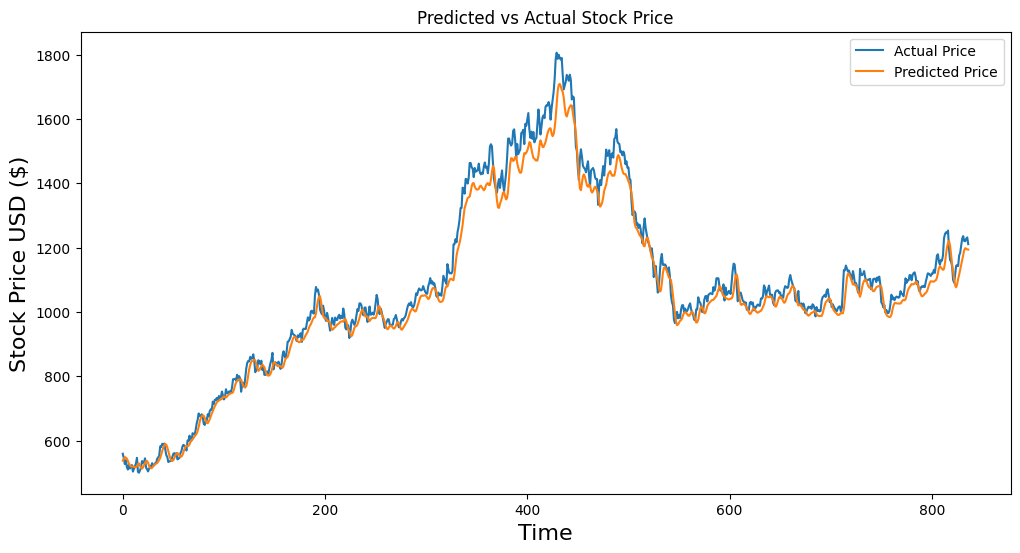

In [26]:
#plot data
plt.figure(figsize=(12,6))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Stock Price USD ($)', fontsize=16)
plt.legend()
plt.show()

In [27]:
# Save the trained model
model.save('stock_price_lstm_model.h5')